In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

Reading In The Data

In [2]:
pd.set_option('display.max_columns', None)
fifa = pd.read_csv(r'fifa21_cleaned.csv', low_memory = False)

In [3]:
fifa.sample(5)

,Unnamed: 0,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,Overall_rating,Potential_rating,Club,Contract,Contract Start,Contract End,Contract Length,Contract Status,Positions,Height,Weight,Preferred Foot,Best_overall,Best Position,Flank,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
15959,15959,224693,Ye Chongqiu,Chongqiu Ye,https://cdn.sofifa.com/players/224/693/21_60.png,http://sofifa.com/player/224693/chongqiu-ye/21...,China PR,27,59,60,Jiangsu Suning FC,2019 ~ 2022,2019.0,2022.0,3.0,Contracted,"CDM, CM",182,80,Right,60,RB,Defender,22-Feb-19,Not on Loan,230000,3000,260000,277,59,47,47,69,55,224,44,39,33,65,43,327,69,64,54,67,73,303,69,61,53,58,62,241,70,50,45,39,37,55,180,55,65,60,64,13,15,6,15,15,1616,340,3,2,Medium,Medium,1,66,54,57,47,57,59,2
14796,14796,215026,P. Magnín,Pablo Magnín,https://cdn.sofifa.com/players/215/026/21_60.png,http://sofifa.com/player/215026/pablo-magnin/2...,Argentina,30,61,61,Club Atlético Tigre,2020 ~ 2021,2020.0,2021.0,1.0,Contracted,"ST, CAM",178,75,Right,61,ST,Striker,16-Sep-20,Not on Loan,325000,3000,348000,285,37,67,56,61,64,268,72,52,41,45,58,299,62,54,57,57,69,292,70,58,39,63,62,230,30,18,52,60,70,48,60,23,14,23,44,6,8,10,10,10,1478,314,3,3,Medium,Medium,1,58,66,52,65,23,50,4
15132,15132,255865,E. Duarte,Eduardo Duarte,https://cdn.sofifa.com/players/255/865/21_60.png,http://sofifa.com/player/255865/eduardo-duarte...,Paraguay,26,60,63,Sportivo Luqueño,2020 ~ 2024,2020.0,2024.0,4.0,Contracted,CB,166,74,Right,62,CB,Defender,01-Jan-20,Not on Loan,275000,500,512000,235,33,40,66,65,31,194,33,28,30,39,64,280,54,59,50,66,51,245,40,62,61,49,33,231,55,65,36,33,42,42,172,51,63,58,48,6,5,10,14,13,1405,301,2,2,Medium,High,1,57,38,45,47,60,54,5
6827,6827,225667,C. Chaplin,Conor Chaplin,https://cdn.sofifa.com/players/225/667/21_60.png,http://sofifa.com/player/225667/conor-chaplin/...,England,23,68,76,Barnsley,2019 ~ 2023,2019.0,2023.0,4.0,Contracted,"ST, CAM, CF",168,69,Left,70,ST,Striker,19-Jul-19,Not on Loan,2700000,6000,2700000,304,48,70,55,64,67,316,69,60,68,51,68,392,80,77,82,69,84,341,72,75,72,58,64,265,45,30,67,64,59,66,106,33,33,40,65,13,16,10,14,12,1789,371,3,3,High,Low,1,78,68,59,71,35,60,31
14797,14797,255729,H. Ángeles,Hugo Ángeles,https://cdn.sofifa.com/players/255/729/21_60.png,http://sofifa.com/player/255729/hugo-angeles/2...,Peru,26,61,63,Sport Huancayo,2020 ~ 2021,2020.0,2021.0,1.0,Contracted,LB,175,69,Left,61,LB,Defender,01-Jan-20,Not on Loan,375000,500,612000,180,62,28,40,24,26,203,55,32,27,28,61,333,70,73,59,55,76,229,23,63,70,48,25,227,49,63,41,40,34,41,177,61,61,55,40,5,6,7,8,14,1389,306,3,2,Medium,High,1,72,27,36,58,59,54,2


In [4]:
#Getting necessary information about the dataset.
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 83 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        18979 non-null  int64  
 1   ID                18979 non-null  int64  
 2   Name              18979 non-null  object 
 3   LongName          18979 non-null  object 
 4   photoUrl          18979 non-null  object 
 5   playerUrl         18979 non-null  object 
 6   Nationality       18979 non-null  object 
 7   Age               18979 non-null  int64  
 8   Overall_rating    18979 non-null  int64  
 9   Potential_rating  18979 non-null  int64  
 10  Club              18979 non-null  object 
 11  Contract          18979 non-null  object 
 12  Contract Start    17729 non-null  float64
 13  Contract End      17729 non-null  float64
 14  Contract Length   18979 non-null  float64
 15  Contract Status   18979 non-null  object 
 16  Positions         18979 non-null  object

No columns except the Contract Start and Contract End columns.



For simple analysis, all the columns will be renamed

In [5]:
# Checking for missing values
pd.set_option('display.max_rows', None)
fifa.isnull().sum()

Unnamed: 0             0
ID                     0
Name                   0
LongName               0
photoUrl               0
playerUrl              0
Nationality            0
Age                    0
Overall_rating         0
Potential_rating       0
Club                   0
Contract               0
Contract Start      1250
Contract End        1250
Contract Length        0
Contract Status        0
Positions              0
Height                 0
Weight                 0
Preferred Foot         0
Best_overall           0
Best Position          0
Flank                  0
Joined                 0
Loan Date End          0
Value                  0
Wage                   0
Release Clause         0
Attacking              0
Crossing               0
Finishing              0
Heading Accuracy       0
Short Passing          0
Volleys                0
Skill                  0
Dribbling              0
Curve                  0
FK Accuracy            0
Long Passing           0
Ball Control           0


In [6]:
# Checking for duplicate values
fifa.duplicated().sum()

0

In [7]:
columns = [col.strip().replace(' ', '_').lower() for col in fifa.columns]

In [8]:
fifa.columns = columns
fifa.head(5)

,unnamed:_0,id,name,longname,photourl,playerurl,nationality,age,overall_rating,potential_rating,club,contract,contract_start,contract_end,contract_length,contract_status,positions,height,weight,preferred_foot,best_overall,best_position,flank,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits
0,0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,2004.0,2021.0,17.0,Contracted,"RW, ST, CF",170,72,Left,93,RW,Winger,01-Jul-04,Not on Loan,103500000,560000,138400000,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,771
1,1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018 ~ 2022,2018.0,2022.0,4.0,Contracted,"ST, LW",187,83,Right,92,ST,Striker,10-Jul-18,Not on Loan,63000000,220000,75900000,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,562
2,2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,2014.0,2023.0,9.0,Contracted,GK,188,87,Right,91,GK,Goalkeeper,16-Jul-14,Not on Loan,120000000,125000,159400000,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,150
3,3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,2015 ~ 2023,2015.0,2023.0,8.0,Contracted,"CAM, CM",181,70,Right,91,CAM,Midfielder,30-Aug-15,Not on Loan,129000000,370000,161000000,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,207
4,4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,2017.0,2022.0,5.0,Contracted,"LW, CAM",175,68,Right,91,LW,Winger,03-Aug-17,Not on Loan,132000000,270000,166500000,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,595


In [9]:
# Getting a description of the dataset
fifa.describe(include = 'all')

,unnamed:_0,id,name,longname,photourl,playerurl,nationality,age,overall_rating,potential_rating,club,contract,contract_start,contract_end,contract_length,contract_status,positions,height,weight,preferred_foot,best_overall,best_position,flank,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits
count,18979.000000,18979.000000,18979,18979,18979,18979,18979,18979.000000,18979.000000,18979.000000,18979,18979,17729.000000,17729.000000,18979.000000,18979,18979,18979.000000,18979.000000,18979,18979.000000,18979,18979,18979,18979,1.897900e+04,18979.000000,1.897900e+04,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.00000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979,18979,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
unique,NaN,NaN,17920,18852,18979,18979,164,NaN,NaN,NaN,682,131,NaN,NaN,NaN,3,640,NaN,NaN,2,NaN,15,5,1869,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,J. Rodríguez,Danny Rose,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,England,NaN,NaN,NaN,No Club,2019 ~ 2021,NaN,NaN,NaN,Contracted,CB,NaN,NaN,Right,NaN,CB,Midfielder,01-Jul-19,Not on Loan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium,Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,13,3,1,1,1705,NaN,NaN,NaN,237,1706,NaN,NaN,NaN,17729,2441,NaN,NaN,14445,NaN,3686,7273,1344,17966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12701,13956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9489.000000,226403.384794,NaN,NaN,NaN,NaN,NaN,25.194109,65.718636,71.136414,NaN,NaN,2018.326245,2022.064414,3.491965,NaN,NaN,181.183940,75.019021,NaN,66.751726,NaN,NaN,NaN,NaN,2.865063e+06,9092.062279,3.962951e+06,248.938142,49.688392,45.842405,51.942726,58.768112,42.696507,256.479214,55.587491,47.246957,42.391011,52.725381,58.528373,317.718689,64.357553,64.412930,63.366721,61.655619,63.925865,296.605195,57.801676,64.577375,62.653986,64.786922,46.785236,254.199747,55.591285,46.394489,50.298962,53.857105,48.057906,58.07366,139.909268,46.559197,47.705622,45.644449,81.436693,16.416302,16.207124,16.076453,16.217187,16.519627,1595.286949,355.702197,2.940513,2.364982,NaN,NaN,1.091628,67.453975,53.457031,57.681016,62.875020,49.866221,64.368934,22.936720
std,5478.909715,27141.054157,NaN,NaN,NaN,NaN,NaN,4.710520,6.968999,6.114635,NaN,NaN,2.091475,1.276312,2.401495,NaN,NaN,6.861351,7.073542,NaN,6.747193,NaN,NaN,NaN,NaN,7.685154e+06,19707.021089,9.772762e+06,74.299428,18.131153,19.567081,17.294409,14.519106,17.646937,78.650601,18.761314,18.207790,

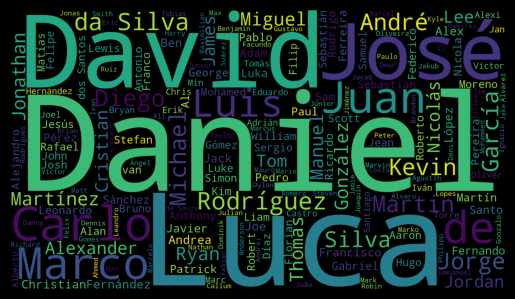

























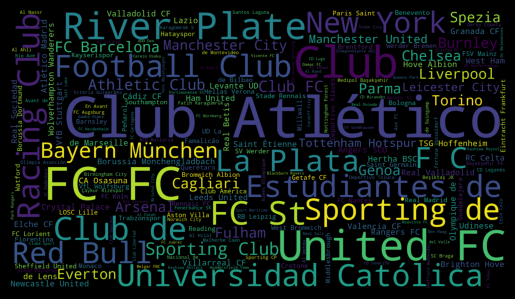

In [10]:
fifa['club'] = fifa.club.replace('No Club', 'Free Agents')

## 1. Top 10 Players With the Highest Rating

In this section, we will take a look at the top 10 players with the highest FIFA rating.

In [11]:
rating = fifa[['name', 'overall_rating']].sort_values('overall_rating', ascending = False).head(10)
print('TABLE 1 : Top 10 players with the Highest Overall Rating')
print('-' * 80)
rating

TABLE 1 : Top 10 players with the Highest Overall Rating
--------------------------------------------------------------------------------


,name,overall_rating
0,L. Messi,93
1,Cristiano Ronaldo,92
2,J. Oblak,91
3,K. De Bruyne,91
4,Neymar Jr,91
5,R. Lewandowski,91
9,M. ter Stegen,90
10,V. van Dijk,90
11,S. Mané,90
8,K. Mbappé,90


## 2. Most Popular Club
In this section, we will take a look at the clubs with the most player in FIFA 2021.

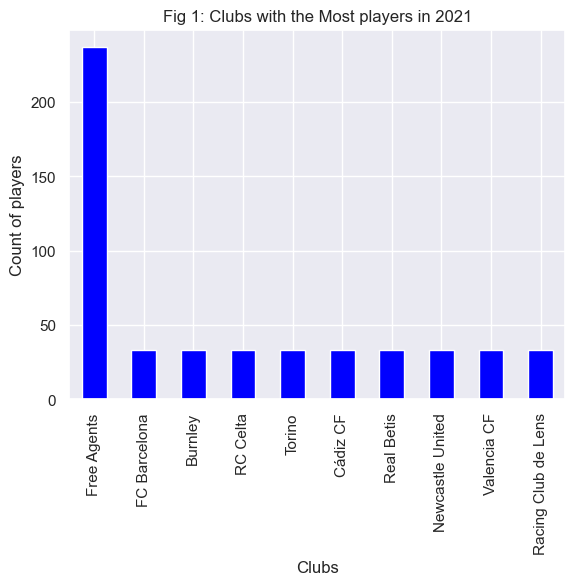

In [12]:
sns.set()
fifa['club'].value_counts(ascending = False).head(10).plot(kind = 'bar', color = 'blue')
plt.title('Fig 1: Clubs with the Most players in 2021')
plt.ylabel('Count of players')
plt.xlabel('Clubs')
plt.show()

Most players in the dataset are free agents i.e does not have a club(over 200 players). The most clubs with the most players are FC Barcelona, Burnley, RC Celta, Torino, Cadiz, Real Betis, Newcastle united, Valencia and racing club.

## 3. Position with the most players.
In this section, we will take a look at the count of players playing in different positions. We will also see a count of player type i.e whether they are midfielders, wingers, defenders, goalkeepers etc.

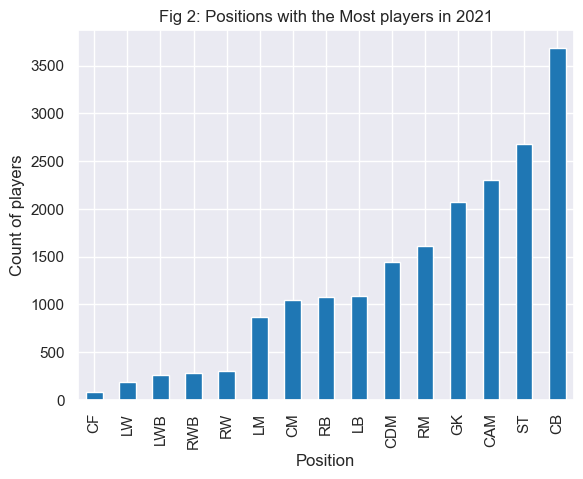

In [13]:
fifa.best_position.value_counts(ascending = True).plot(kind = 'bar', colormap = 'tab10')
plt.title('Fig 2: Positions with the Most players in 2021')
plt.ylabel('Count of players')
plt.xlabel('Position')
plt.show()

Most players can play in the 'CB' position. This is followed by the 'ST' position and the 'CAM' position.

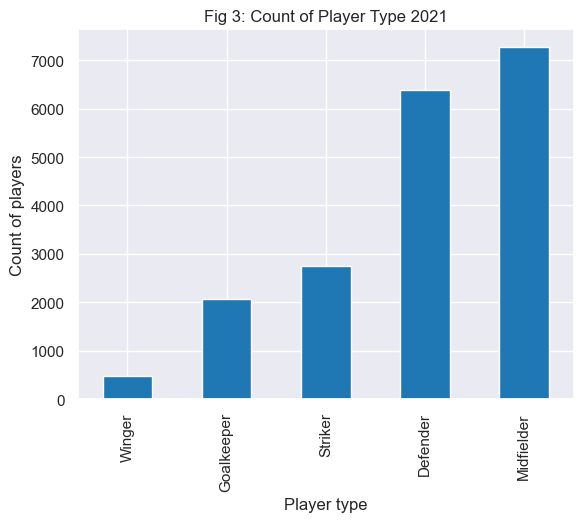

In [14]:
fifa.flank.value_counts(ascending = True).plot(kind = 'bar', colormap = 'tab10')
plt.title('Fig 3: Count of Player Type 2021')
plt.ylabel('Count of players')
plt.xlabel('Player type')
plt.show()

Most of the players are midfielders, followed by defenders, then strikers. Wingers are the fewest.












## 4. Tallest Player



In this section, we will take a look at the most tallest player in FIFA 2021.

In [15]:
print('TABLE 2 : Tallest Player')
print('-' * 80)
fifa[fifa.height == fifa.height.max()]

TABLE 2 : Tallest Player
--------------------------------------------------------------------------------


,unnamed:_0,id,name,longname,photourl,playerurl,nationality,age,overall_rating,potential_rating,club,contract,contract_start,contract_end,contract_length,contract_status,positions,height,weight,preferred_foot,best_overall,best_position,flank,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits
10333,10333,199321,T. Holý,Tomáš Holý,https://cdn.sofifa.com/players/199/321/21_60.png,http://sofifa.com/player/199321/tomas-holy/210...,Czech Republic,28,65,67,Ipswich Town,2019 ~ 2022,2019.0,2022.0,3.0,Contracted,GK,206,102,Right,65,GK,Goalkeeper,01-Jul-19,Not on Loan,600000,3000,867000,87,13,18,18,18,20,98,16,20,14,29,19,189,22,33,35,58,41,185,42,48,19,60,16,98,21,15,9,30,23,43,66,16,25,25,318,68,60,56,65,69,1041,346,3,1,Medium,Medium,1,68,60,56,69,28,65,16


The tallest player is Tomáš Holý, a goalkeeper from Czech Republic playing in Ipswich Town with a height of 206cm.

## 5. Most Valued Player


In this section, we will take a look at the top 10 players with the highest value.

In [16]:
ten_valued = fifa.sort_values(by = 'value', ascending = False).head(10)

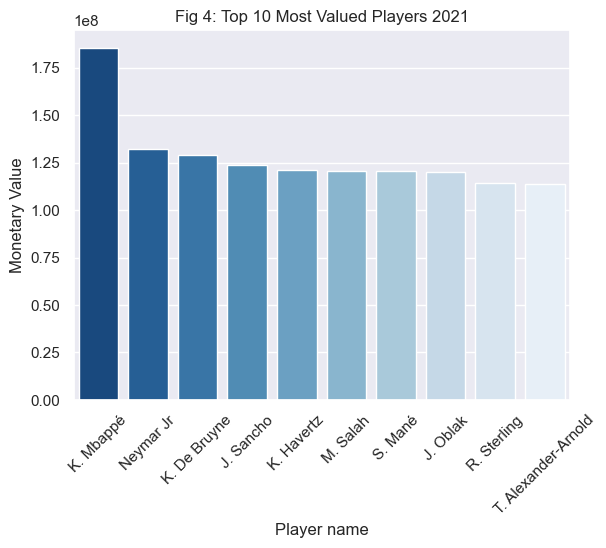

In [17]:
sns.barplot(x = 'name', y = 'value', data = ten_valued, palette = 'Blues_r')
plt.title('Fig 4: Top 10 Most Valued Players 2021')
plt.ylabel('Monetary Value')
plt.xlabel('Player name')
plt.xticks(rotation = 45)
plt.show()

The most valued player is K.Mbappe from Paris Saint Germain, followed by Neymar Jr from Paris Saint Germain and De Bryune from Manchester city

## 6. Most Paid Player
In this section, we will take a look at the top 10 players with the highest wage.

In [18]:
ten_most_paid = fifa.sort_values(by = 'wage', ascending = False).head(10)

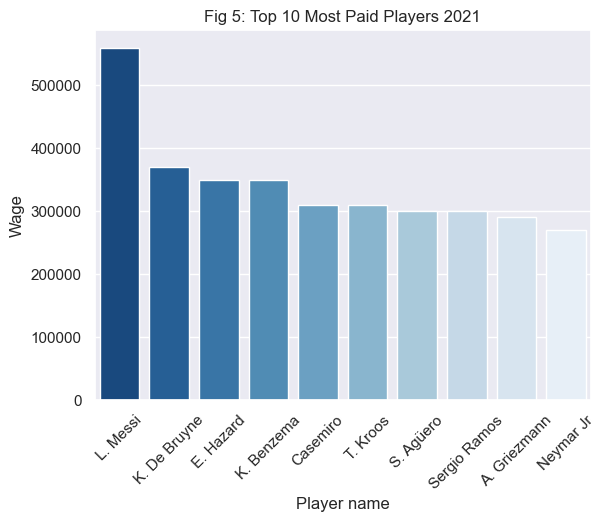

In [19]:
sns.barplot(x = 'name', y = 'wage', data = ten_most_paid, palette = 'Blues_r')
plt.title('Fig 5: Top 10 Most Paid Players 2021')
plt.ylabel('Wage')
plt.xlabel('Player name')
plt.xticks(rotation = 45)
plt.show()

The most paid player is Lionel Messi, De Bryune and Hazard. Debryune and Neymar Jr are the only players who appear in the Top 10 most valued players and the Top 10 most paid players

## 7. Players below 25 with the Highest Potential 


In this section, we will take a look at the players which are below the age of 25 and have a potential rating above 90 

In [20]:
below_25 = fifa[(fifa.age < 25) & (fifa.potential_rating > 90)][['name', 'nationality', 'club', 'age', 'potential_rating']]

In [21]:
print('TABLE 3 : Players below 25 with Highest Potential Rating')
print('-' * 80)
below_25.sort_values('potential_rating', ascending = False)

TABLE 3 : Players below 25 with Highest Potential Rating
--------------------------------------------------------------------------------


,name,nationality,club,age,potential_rating
8,K. Mbappé,France,Paris Saint-Germain,21,95
29,J. Sancho,England,Borussia Dortmund,20,93
65,K. Havertz,Germany,Chelsea,21,93
280,João Félix,Portugal,Atlético Madrid,20,93
370,Vinícius Jr.,Brazil,Real Madrid,19,93
30,T. Alexander-Arnold,England,Liverpool,21,92
66,M. de Ligt,Netherlands,Juventus,20,92
69,G. Donnarumma,Italy,Milan,21,92
105,E. Haaland,Norway,Borussia Dortmund,19,92
68,M. Rashford,England,Manchester United,22,91


## 8. Nationality with the Highest Players
In this section, we will take a look at the top 20 nationality with the most players

In [22]:
ten_most_nations = fifa.nationality.value_counts().head(20)
ten_most_nations

England                1705
Germany                1195
Spain                  1065
France                 1003
Argentina               943
Brazil                  887
Japan                   485
Netherlands             438
Italy                   387
Sweden                  380
United States           376
China PR                364
Mexico                  362
Norway                  362
Portugal                361
Poland                  354
Uruguay                 348
Korea Republic          340
Republic of Ireland     340
Colombia                339
Name: nationality, dtype: int64

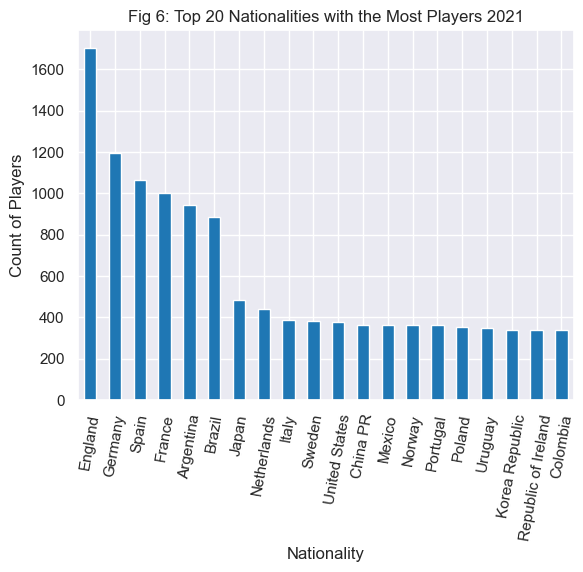

In [23]:
ten_most_nations.plot(kind = 'bar', colormap = 'tab20', rot = 80)
plt.title('Fig 6: Top 20 Nationalities with the Most Players 2021')
plt.ylabel('Count of Players')
plt.xlabel('Nationality')
plt.show()

England, Germany, Spain and France produced the most players as can be seen in the chart above.

## 9. Youngest Players

In this section, we will take a look at the top 20 youngest players, their clubs, nationality and age.

In [24]:
young_players = fifa.sort_values('age')[['name', 'club', 'nationality', 'age']].head(20)
print('TABLE 4 : Top 20 Youngest Players')
print('-' * 80)
young_players

TABLE 4 : Top 20 Youngest Players
--------------------------------------------------------------------------------


,name,club,nationality,age
17900,R. Richards,West Bromwich Albion,England,16
8223,A. Karabec,Sparta Praha,Czech Republic,16
16764,K. Arnstad,RSC Anderlecht,Norway,16
8116,R. Cherki,Olympique Lyonnais,France,16
16387,W. Faghir,Vejle Boldklub,Denmark,16
18684,X. Dziekoński,Jagiellonia Białystok,Poland,16
16229,M. Tanlongo,Rosario Central,Argentina,16
16158,L. Gourna-Douath,AS Saint-Étienne,France,16
15061,Barredo,SD Ponferradina,Spain,16
18497,R. Orihuela,Club Blooming,Bolivia,16


## 10. Oldest Players

In this section, we will take a look at the top 20 oldest players, their clubs, nationality and age.

In [25]:
old_players = fifa.sort_values('age', ascending = False)[['name', 'club', 'nationality', 'age']].head(20)
print('TABLE 5 : Top 20 oldest Players')
print('-' * 80)
old_players

TABLE 5 : Top 20 oldest Players
--------------------------------------------------------------------------------


,name,club,nationality,age
16109,K. Miura,Yokohama FC,Japan,53
10834,H. Sulaimani,Al Ahli,Saudi Arabia,43
11426,L. Butrón,Alianza Lima,Peru,43
262,G. Buffon,Juventus,Italy,42
3964,C. Lucchetti,Atlético Tucumán,Argentina,42
1083,Hilton,Montpellier HSC,Brazil,42
10101,S. Nakamura,Yokohama FC,Japan,42
14779,L. Fernández,SD Aucas,Colombia,42
7736,J. Gillet,Standard de Liège,Belgium,41
15083,D. Bulman,Crawley Town,England,41


## 11. Players Age

In this section, we will take a look at the distribution of the players' age.

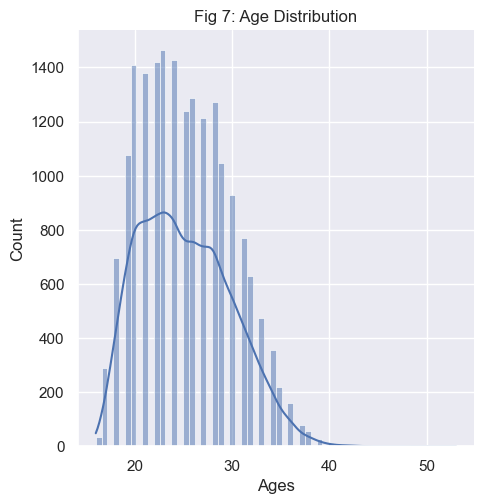

In [26]:
sns.displot(fifa.age, kde = True)
plt.title('Fig 7: Age Distribution')
plt.ylabel('Count')
plt.xlabel('Ages')
plt.show()

From Fig. 7 above, we can see that the ages of the majority of the players ranges between 20 and 35.

## 12. Most Searched Players
In this section, we will take a look at the top 10 most searched players on the FIFA database. The hit column represents the number of searches a player has.

In [27]:
popular_players = fifa.sort_values('hits', ascending = False)[['longname', 'club', 'nationality', 'age', 'hits']].head(10)
print('TABLE 6: Most searched players in 2021')
print('-' * 80)
popular_players

TABLE 6: Most searched players in 2021
--------------------------------------------------------------------------------


,longname,club,nationality,age,hits
2579,Axel Tuanzebe,Manchester United,England,22,8400
15819,Daniel Maldini,Milan,Italy,18,6000
3791,Pedro González López,FC Barcelona,Spain,17,4300
68,Marcus Rashford,Manchester United,England,22,3200
690,Francisco Mota Castro Trincão,FC Barcelona,Portugal,20,3000
1265,Anssumane Fati,FC Barcelona,Spain,17,2800
8401,Dujon Sterling,Chelsea,England,20,2500
4800,Charles De Ketelaere,Club Brugge KV,Belgium,19,2300
106,Alex Nicolao Telles,Manchester United,Brazil,27,2300
416,José Ángel Esmoris Tasende,RB Leipzig,Spain,23,2000


The most searched player is Axel Tuanzebe, a manchester united youngster, followed by Daniel Maldini.

## 12. Top 10 players Playing Each Positions and Their Overall Rating.

In [28]:
for position in fifa.best_position.unique():
    print('Top 10 players playing in the {} position'.format(position))
    print(fifa[fifa.best_position == position][['name', 'age', 'club', 'preferred_foot', 'overall_rating']].sort_values('overall_rating', ascending = False).head(10))
    print('-' * 100)

Top 10 players playing in the RW position
               name  age                    club preferred_foot  \
0          L. Messi   33            FC Barcelona           Left   
6          M. Salah   28               Liverpool           Left   
31   Bernardo Silva   25         Manchester City           Left   
43      A. Di María   32     Paris Saint-Germain           Left   
75        R. Mahrez   29         Manchester City           Left   
173           Portu   28           Real Sociedad          Right   
205         G. Bale   30       Tottenham Hotspur           Left   
210         C. Vela   31          Los Angeles FC           Left   
268         Willian   31                 Arsenal          Right   
216      F. Thauvin   27  Olympique de Marseille           Left   

     overall_rating  
0                93  
6                90  
31               87  
43               87  
75               85  
173              83  
205              83  
210              83  
268              82  


                name  age                     club preferred_foot  \
167     João Cancelo   26          Manchester City          Right   
177    Nélson Semedo   26  Wolverhampton Wanderers          Right   
249  Mário Fernandes   29          PFC CSKA Moscow          Right   
337       M. Doherty   28        Tottenham Hotspur          Right   
451     P. Kadeřábek   28      TSG 1899 Hoffenheim          Right   
552        L. Dubois   25       Olympique Lyonnais          Right   
777        R. Zobnin   26           Spartak Moscow          Right   
780   Ricardo Esgaio   27                 SC Braga          Right   
827      D. da Costa   26      Eintracht Frankfurt          Right   
844    L. Spinazzola   27                     Roma          Right   

     overall_rating  
167              83  
177              83  
249              82  
337              81  
451              80  
552              79  
777              78  
780              78  
827              78  
844              78 

## 14. Wage vs Value 
In this section, we will take a look at the relationship between a player's monetary value and wage.

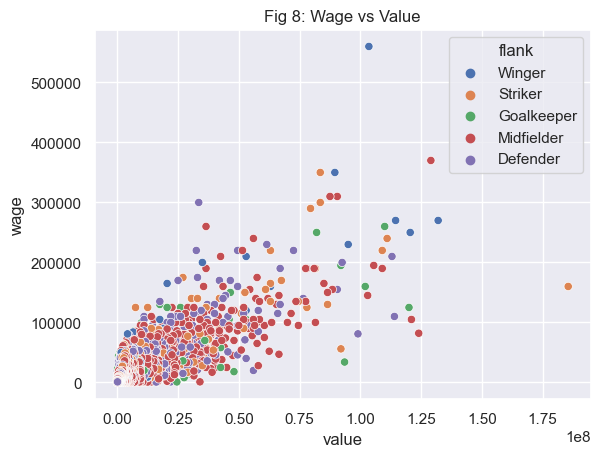

In [29]:
sns.scatterplot(x= 'value', y= 'wage', data = fifa, hue= 'flank')
plt.title('Fig 8: Wage vs Value')
plt.show()

There is a positive correlation between player's wage and value, but towards the right of the plot, there is a player who is valued the most, but is paid less as compared to his monetary value.

In [30]:
print('TABLE 7: Player With More value as compared to wages')
print('-' * 80)
fifa[fifa.value == fifa.value.max()]

TABLE 7: Player With More value as compared to wages
--------------------------------------------------------------------------------


,unnamed:_0,id,name,longname,photourl,playerurl,nationality,age,overall_rating,potential_rating,club,contract,contract_start,contract_end,contract_length,contract_status,positions,height,weight,preferred_foot,best_overall,best_position,flank,joined,loan_date_end,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits
8,8,231747,K. Mbappé,Kylian Mbappé,https://cdn.sofifa.com/players/231/747/21_60.png,http://sofifa.com/player/231747/kylian-mbappe/...,France,21,90,95,Paris Saint-Germain,2018 ~ 2022,2018.0,2022.0,4.0,Contracted,"ST, LW, RW",178,73,Right,91,ST,Striker,01-Jul-18,Not on Loan,185500000,160000,203100000,408,78,91,73,83,83,394,92,79,63,70,90,458,96,96,92,92,82,404,86,77,86,76,79,341,62,38,91,80,70,84,100,34,34,32,42,13,5,7,11,6,2147,466,4,5,High,Low,3,96,86,78,91,39,76,1600


The name of the player is Kylian Mbappe who is valued at 185.5 million but is only paid 160,000.

## 15. Most Valued Teams In England's Top Six Teams.
 In this section, we take  look at the teams with the most value in the English top 6 teams.

In [31]:
english_top6 = fifa[fifa.club.isin(['Chelsea', 'Tottenham Hotspur', 'Manchester United', 'Arsenal', 'Liverpool', 'Manchester City'])]

In [32]:
top5_total_value = english_top6.groupby('club')[['value','wage']].mean().reset_index().sort_values('value', ascending = False)
print('TABLE 8: Most Valued England Top Six Teams')
print('-' * 80)
top5_total_value

TABLE 8: Most Valued England Top Six Teams
--------------------------------------------------------------------------------


,club,value,wage
2,Liverpool,3.867652e+07,91772.727273
3,Manchester City,3.598939e+07,110272.727273
4,Manchester United,2.711758e+07,90484.848485
1,Chelsea,2.692803e+07,76787.878788
5,Tottenham Hotspur,2.631970e+07,75606.060606
0,Arsenal,1.773864e+07,64393.939394


The most valued team in England is Liverpool followed by Manchester United and Manchester City. Arsenal is the least valued team.

## 16. Most Searched Teams
In this section, we take a loot at the most searched teams(Teams with the Most Searched PLayers).

In [33]:
clubs_total_hits = fifa.groupby('club')['hits'].sum().reset_index().sort_values('hits', ascending = False)

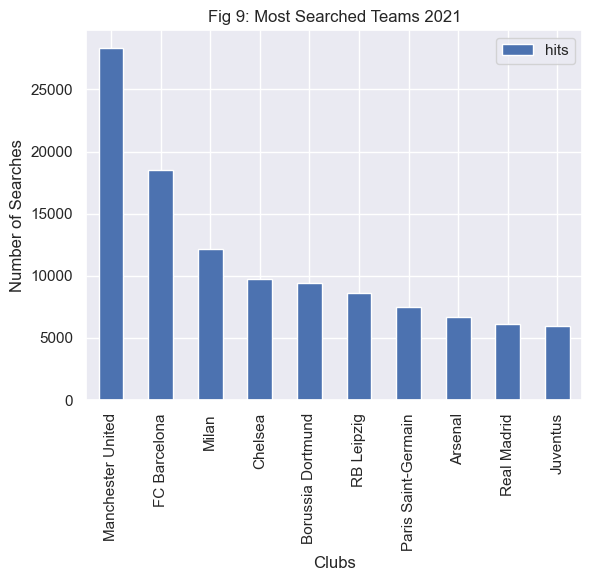

In [34]:
clubs_total_hits.head(10).plot(x = 'club',kind = 'bar')
plt.title('Fig 9: Most Searched Teams 2021')
plt.ylabel('Number of Searches')
plt.xlabel('Clubs')
plt.show()

## 16. Age vs Value
In this section, we will take a look at the relationship between a player's age and monetary value.

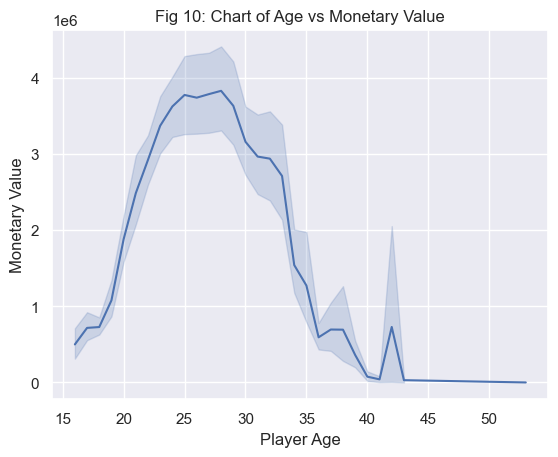

In [35]:
sns.lineplot(x = 'age', y = 'value', data = fifa)
plt.title('Fig 10: Chart of Age vs Monetary Value')
plt.ylabel('Monetary Value')
plt.xlabel('Player Age')
plt.show()

In general, there is a gradual increase in monetary value with a gradual increase in age for ages up to age 26. This is mostly because at that age, most players are playing at their prime. This trend tends to move in the opposite direction i.e decrease gradually when the player crosses the age of 26. There is a spike in value for the ages 42. This is due to the low occurence of players within that age. 

## 17. Value vs Overall Rating 

In this section, we will take a look at the relationship between a player's monetary value and overall rating.


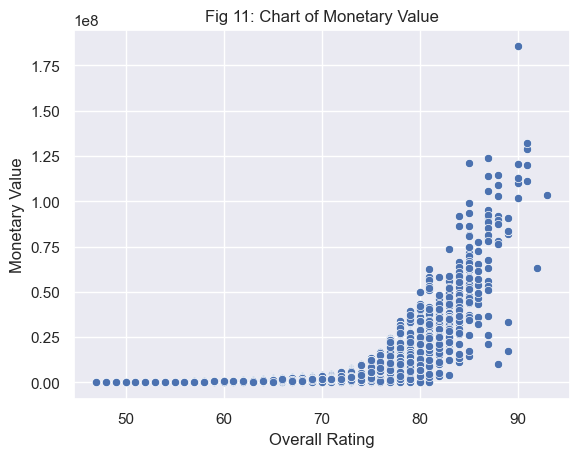

In [36]:
sns.scatterplot(y = 'value', x = 'overall_rating', data = fifa)
plt.title('Fig 11: Chart of Monetary Value')
plt.ylabel('Monetary Value')
plt.xlabel('Overall Rating')
plt.show()

There is a positive correlation between the value of players and overall rating. This can be seen for players above the mean overall rating(65).

## 18. Overall Rating vs Age
In this section, we will take a look at the relationship between a player's overall Rating and age.

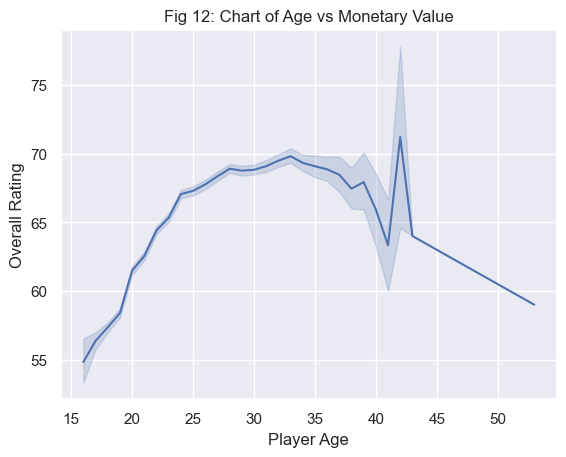

In [37]:
sns.lineplot(x = 'age', y = 'overall_rating', data = fifa)
plt.title('Fig 12: Chart of Age vs Monetary Value')
plt.ylabel('Overall Rating')
plt.xlabel('Player Age')
plt.show()

In general, there is a gradual increase in overall rating for ages up to 33. This is mostly because at that age, most players are still actively playing competitively. This trend tends to move in the opposite direction i.e decrease gradually when the player crosses the age of 33. This is because at this age, most players are already approaching the end of their football careers. 

## 19. Clubs With the Highest Potential Rating

In [38]:
high_potential = fifa.groupby('club')['potential_rating'].mean().reset_index().sort_values('potential_rating', ascending = False)
print('TABLE 10: Top 10 Clubs With The Highest Potential Rating')
print('-' * 80)
high_potential.head(10)

TABLE 10: Top 10 Clubs With The Highest Potential Rating
--------------------------------------------------------------------------------


,club,potential_rating
216,FC Bayern München,85.173913
490,Real Madrid,85.033333
387,Manchester City,83.818182
375,Liverpool,83.727273
214,FC Barcelona,83.636364
388,Manchester United,83.030303
131,Chelsea,83.000000
613,Tottenham Hotspur,82.636364
452,Paris Saint-Germain,82.500000
340,Juventus,82.321429


On average, FC Bayern München is the team with the Highest Potential Rating followed by Real Madrid and Manchester City.

## 20. Youngest Club.

In [39]:
youngest_club = fifa.groupby('club')['age'].mean().reset_index().sort_values('age', ascending = True)
print('TABLE 11: Top 20 Clubs with the Youngest Players')
print('-' * 80)
youngest_club.head(20)

TABLE 11: Top 20 Clubs with the Youngest Players
--------------------------------------------------------------------------------


,club,age
78,Bayern München II,20.571429
238,FC Nordsjælland,20.846154
512,SC Heerenveen,21.208333
262,Famalicão,21.433333
75,Barnsley,21.533333
15,AFC Wimbledon,21.750000
249,FC Twente,21.880000
374,Lincoln City,21.892857
129,Chamois Niortais Football Club,22.100000
598,Strømsgodset IF,22.148148


The team with the youngest players is Bayern Munchen II with an average age of 20.57

## 21. Oldest Club.

In [40]:
oldest_club = fifa.groupby('club')['age'].mean().reset_index().sort_values('age', ascending = False)
print('TABLE 12: Top 20 Clubs with the Oldest Players')
print('-' * 80)
oldest_club.head(20)

TABLE 12: Top 20 Clubs with the Oldest Players
--------------------------------------------------------------------------------


,club,age
472,Qingdao Huanghai F.C.,29.360000
276,Free Agents,29.316456
36,Al Fayha,29.200000
559,Shanghai Greenland Shenhua FC,29.115385
10,AC Mineros de Guayana,29.040000
675,Yokohama FC,29.033333
570,Sivasspor,29.000000
70,BB Erzurumspor,28.923077
338,Jorge Wilstermann,28.800000
671,Wuhan Zall,28.571429


The team with the oldest players is Qingdao Huanghai F.C. with an average age of 29.36